<a href="https://colab.research.google.com/github/darsh0820/Deep-Learning_Image-Classification/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Long Short-Term Memory (LSTM) Network

##Importing Libraries

In [ ]:
from tensorflow.keras import layers, models, datasets, utils

##Preparing the data

### Loading dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

### Reshape the data

In [ ]:
# Preprocess the data
# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

### Encoding the labels

In [ ]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

##Creating the model

### Create the model

In [ ]:
model = models.Sequential()

### Adding Layers

In [ ]:
# LSTM with 128 units
model.add(layers.LSTM(128, input_shape=(28, 28), activation='relu'))

# Output layer for 10 classes (digits 0-9)
model.add(layers.Dense(10, activation='softmax'))

### Compiling with optimizer and loss function

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Summarizing the model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               80384     
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 81674 (319.04 KB)
Trainable params: 81674 (319.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Training the model

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=1)


Epoch 1/5
938/938 [==============================] - 22s 24ms/step - loss: 0.0297 - accuracy: 0.9906
Epoch 2/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0261 - accuracy: 0.9914
Epoch 3/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0238 - accuracy: 0.9928
Epoch 4/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0229 - accuracy: 0.9929
Epoch 5/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0205 - accuracy: 0.9937


##Model Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 3s - loss: 0.0456 - accuracy: 0.9867 - 3s/epoch - 8ms/step

Test accuracy: 0.9866999983787537


##Plotting prediction results

### Predicted values

313/313 [==============================] - 3s 9ms/step


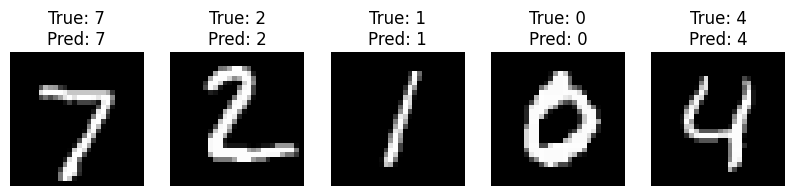

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(x_test)

def plot_images(images, labels, predictions, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {np.argmax(labels[i])}\nPred: {np.argmax(predictions[i])}")
        plt.axis('off')

    plt.show()

plot_images(x_test, y_test, predictions)

##Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Convert predicted probabilities to class labels
predictions = np.argmax(predictions, axis=1)

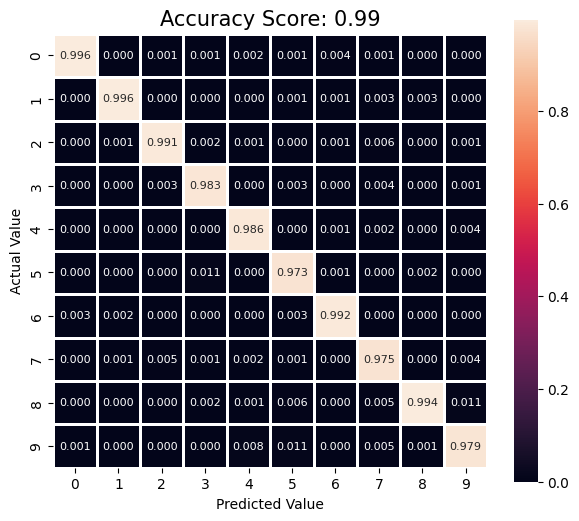

In [ ]:
#Convert y_test to single-integer format if it's one-hot encoded
if y_test.ndim == 2:
    y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, predictions , normalize='pred')

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.75, square = True, annot_kws={"size": 8})
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.title('Accuracy Score: {:.2f}'.format(test_acc), size = 15)
plt.show()